In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
plt.rcParams['figure.figsize'] = 16, 12

In [45]:
% matplotlib inline

In [50]:
cnsmr_cmplnts = pd.read_csv("complaints_dec_2014.csv")
cnsmr_cmplnts = cnsmr_cmplnts[["Complaint ID", "Product", "Date received", "Company", "Company response"]]

In [52]:
temp = pd.DatetimeIndex(cnsmr_cmplnts['Date received'])
cnsmr_cmplnts["weekdays"] = temp.weekday

In [53]:
cnsmr_cmplnts["Date_received"] = cnsmr_cmplnts.pop('Date received')
cnsmr_cmplnts.index = pd.to_datetime(cnsmr_cmplnts.pop('Date_received'))

In [11]:
products = cnsmr_cmplnts.groupby("Product").count().sort("Complaint ID", ascending = False)
products = products.T
companies = cnsmr_cmplnts.groupby("Company").count().sort("Complaint ID", ascending = False).head(10)
companies = companies.T
company_responses = cnsmr_cmplnts.groupby("Company response").count().sort("Complaint ID", ascending = False)
company_responses = company_responses.T

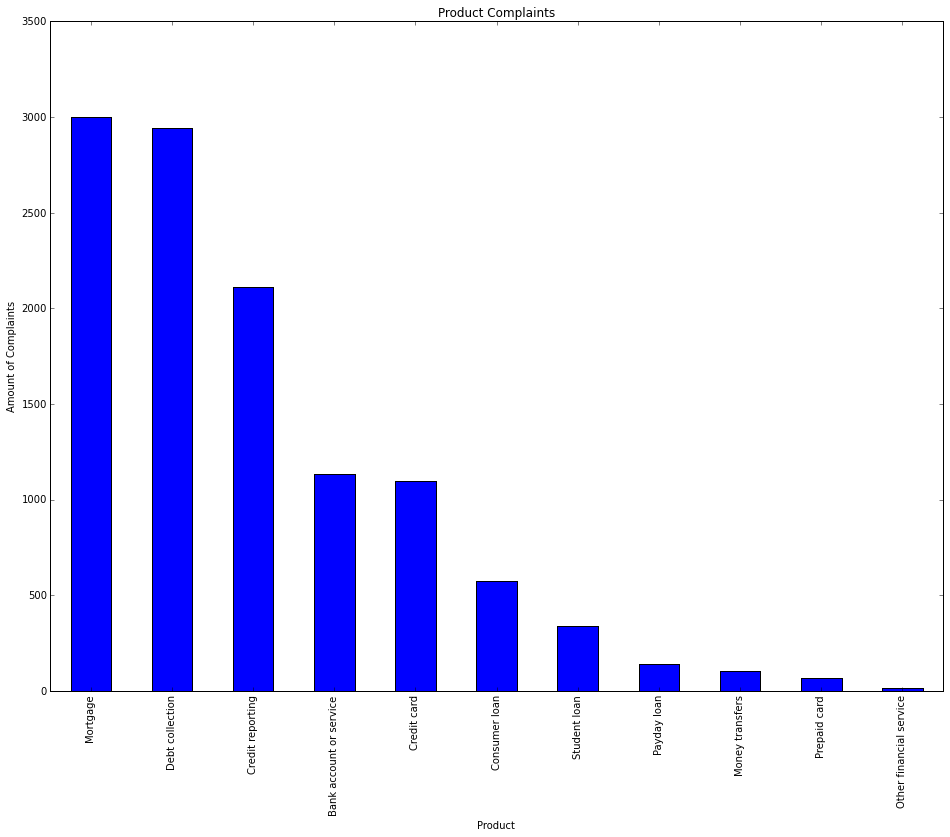

In [125]:
plt.figure();

products.ix[0].plot(kind='bar', sort_columns=True); plt.axhline(0, color='k');
plt.title("Product Complaints")
plt.ylabel("Amount of Complaints")

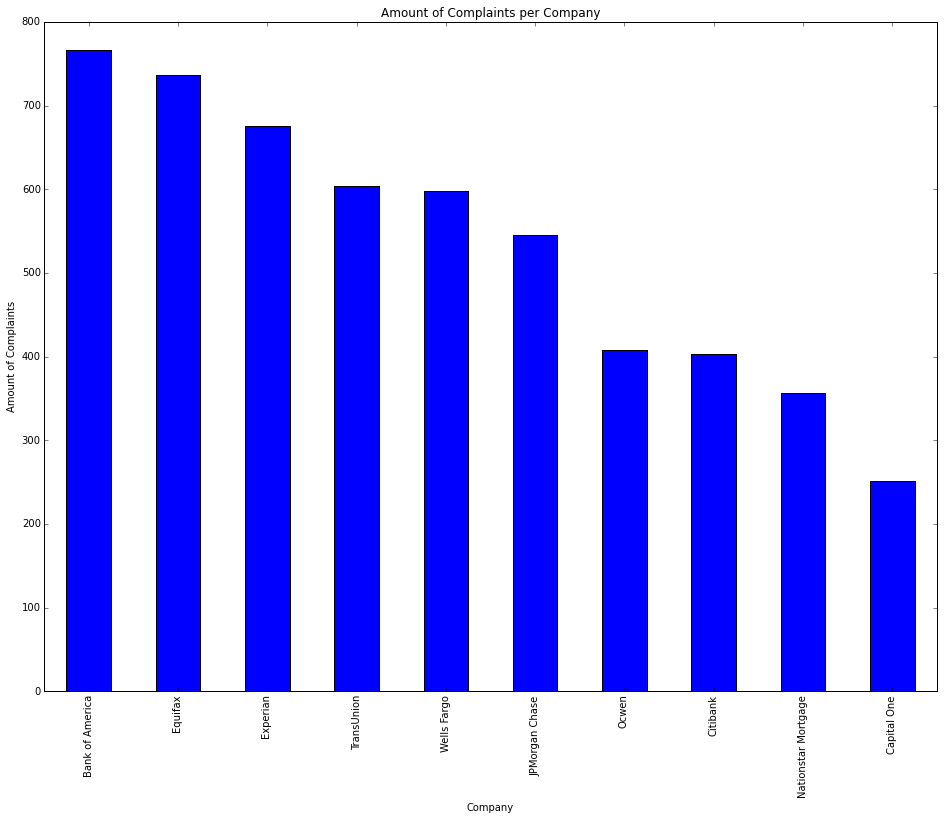

In [126]:
companies.ix[0].plot(kind="bar", sort_columns=True); plt.axhline(0, color='k')
plt.title("Amount of Complaints per Company")
plt.ylabel("Amount of Complaints")

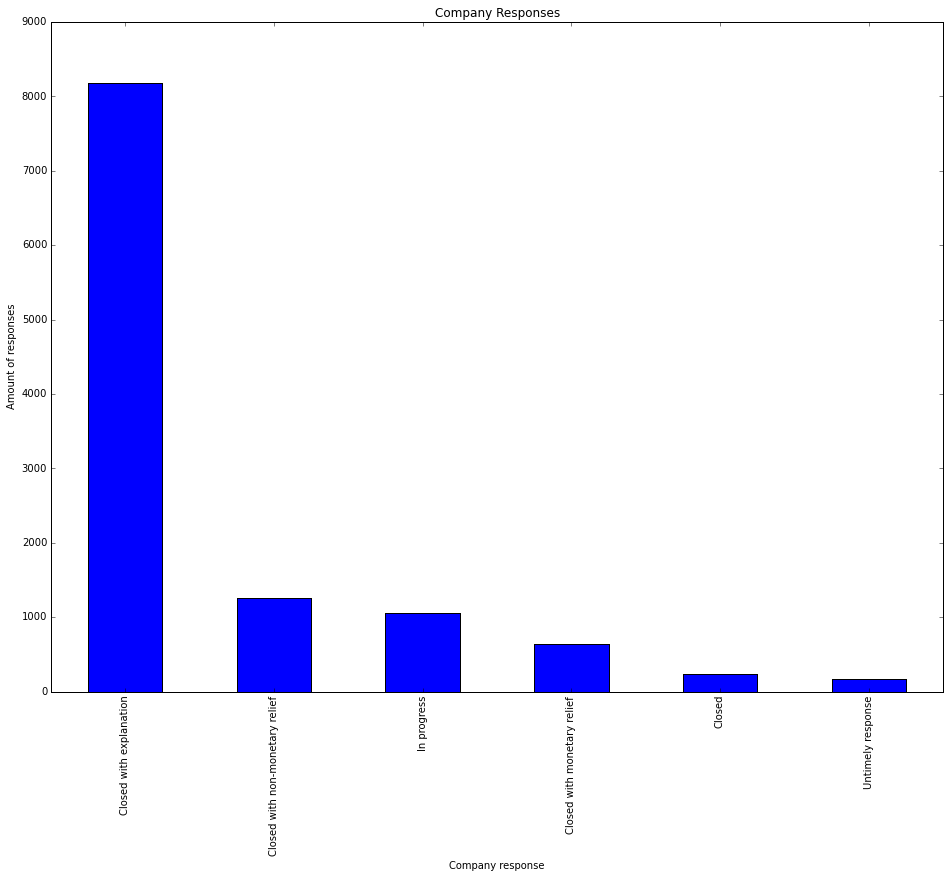

In [128]:
company_responses.ix[0].plot(kind="bar", sort_columns=True); plt.axhline(0, color='k')
plt.title("Company Responses")
plt.ylabel("Amount of responses")

In [75]:
days = {}
for date in cnsmr_cmplnts.index:
    if date in days:
        days[date] += 1
    else:
        days[date] = 1

In [95]:
day_name = {}
for num in range(len(cnsmr_cmplnts.index)):
    if cnsmr_cmplnts.index[num] in days:
        day_name[cnsmr_cmplnts.index[num]] = cnsmr_cmplnts.weekdays[num]
        

In [107]:
day = []
week = []
for num in range(7):
    for timestamp in day_name:
        if day_name[timestamp] == num:
            day.append(days[timestamp])
    week.append(day)
    day = []

In [109]:
day_mean = []
for day in week:
    day_mean.append(np.mean(day))

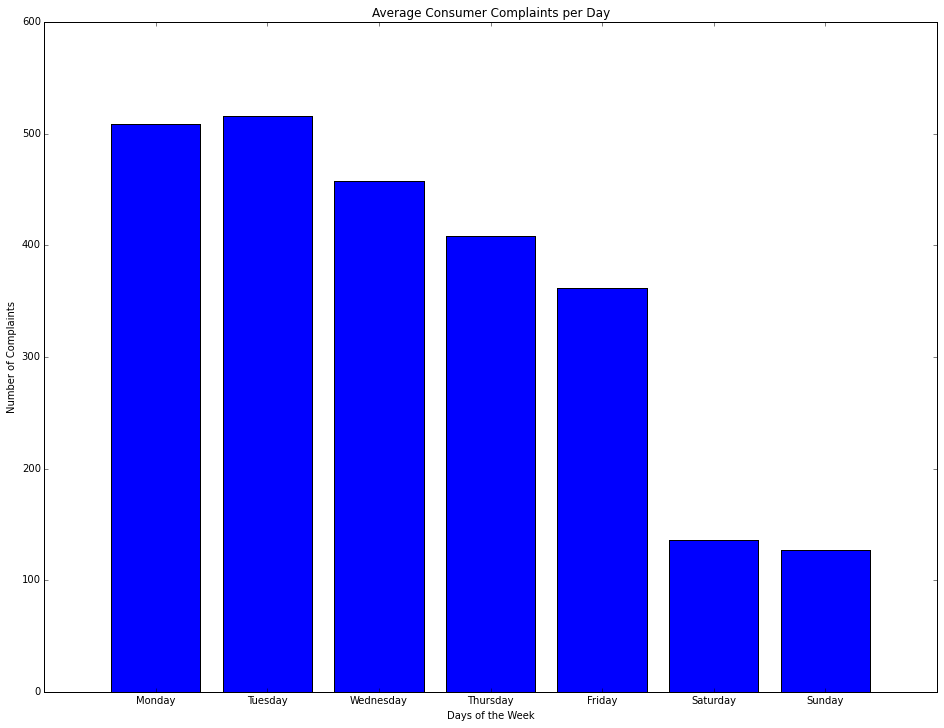

In [119]:
y = day_mean
x = range(len(y))
z = "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2,3,4,5,6], z)
plt.title("Average Consumer Complaints per Day")
plt.ylabel("Number of Complaints")
plt.xlabel("Days of the Week")

fig = plt.gcf()